In [37]:
# !pip install matplotlib
# !pip install torch 

In [83]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (5, 4)

## Create clusters

In [38]:
import math, matplotlib.pyplot as plt, operator, torch
from functools import partial
torch.manual_seed(42)
torch.set_printoptions(precision=3, linewidth=140, sci_mode=False)

In [39]:
from torch.distributions.multivariate_normal import MultivariateNormal
from torch import tensor

In [40]:
n_clusters=6
n_samples =250

In [41]:
def sample(cent, n=n_samples): return MultivariateNormal(cent, torch.diag(tensor([5.,5.]))).sample((n,))

In [42]:
sample(tensor([10.,10.]), 3)

tensor([[10.753, 10.288],
        [10.524, 10.515],
        [ 7.489,  9.583]])

In [153]:
centroids = torch.rand(n_clusters, 2)*70-35
centroids

tensor([[-34.076,   0.183],
        [  9.263,  21.333],
        [-27.081, -10.538],
        [  1.320,   3.713],
        [  5.903, -25.999],
        [ 27.164, -31.628]])

In [154]:
data = torch.cat([sample(c) for c in centroids])
data.shape

torch.Size([1500, 2])

In [155]:
def plot_data(centroids, data, n_samples=n_samples,  ax=None):
    if ax is None: _,ax = plt.subplots()
    for i, centroid in enumerate(centroids):
        samples = data[i*n_samples:(i+1)*n_samples]
        ax.scatter(samples[:,0], samples[:,1], s=1)
        ax.plot(*centroid, markersize=10, marker="x", color='k', mew=5)
        ax.plot(*centroid, markersize=5, marker="x", color='m', mew=2)

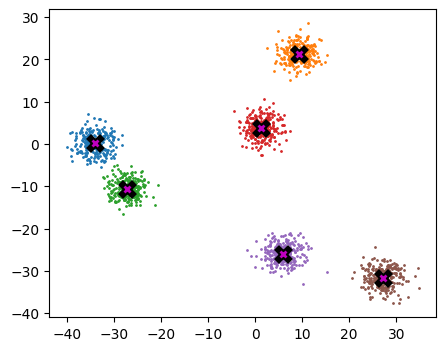

In [156]:
plot_data(centroids, data)

## Mean shift algo 

In [157]:
def gaussian(d, bw): return torch.exp(-0.5*((d/bw))**2) / (bw*math.sqrt(2*math.pi))

In [158]:
def plot_func(f):
    x = torch.linspace(0,10,100)
    plt.plot(x, f(x))

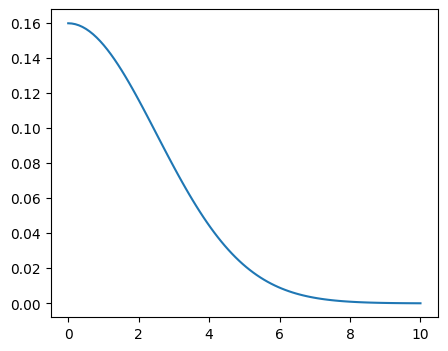

In [159]:
plot_func(partial(gaussian, bw=2.5))

In [160]:
X = data.clone()
x = X[0]
X.shape, x.shape

(torch.Size([1500, 2]), torch.Size([2]))

In [161]:
dists = ((X - x)**2).sum(axis=1).sqrt(); dists

tensor([ 0.000,  1.692,  3.559,  ..., 69.635, 71.162, 70.599])

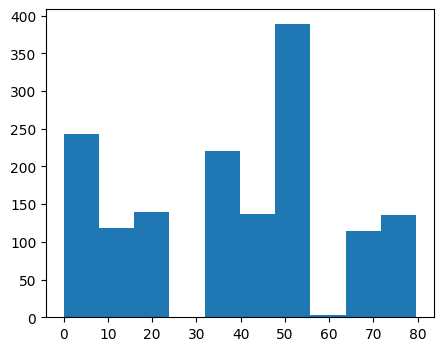

In [162]:
plt.hist(dists);

In [163]:
weights = gaussian(dists, bw=2.5); weights 

tensor([0.160, 0.127, 0.058,  ..., 0.000, 0.000, 0.000])

In [164]:
update = (weights[:, None]* X).sum(axis=0) / weights.sum(); update

tensor([-34.950,   1.341])

In [165]:
x + update 

tensor([-70.769,   4.100])

In [166]:
x

tensor([-35.819,   2.759])

In [167]:
def one_update(X):
    for i, x in enumerate(X):
        dists = ((X - x)**2).sum(1).sqrt()
        weights = gaussian(dists, bw=2.5)
        update = (weights[:, None]* X).sum(0) / weights.sum()
        X[i] = update

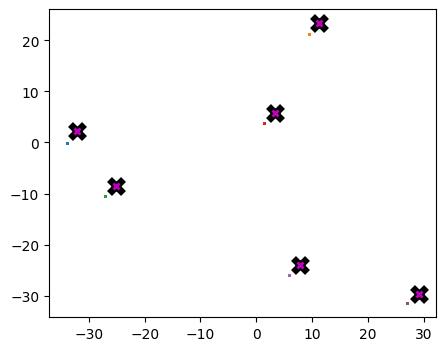

In [172]:
X = data.clone()
for i in range(10):
    one_update(X)
plot_data(centroids + 2, X)

In [173]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [174]:
def do_one(d):
    if d: one_update(X)
    ax.clear()
    plot_data(centroids+2, X, n_samples, ax=ax)

In [175]:
# create your own animation
X = data.clone()
fig,ax = plt.subplots()
ani = FuncAnimation(fig, do_one, frames=8, interval=500, repeat=False)
plt.close()
HTML(ani.to_jshtml())